#**Healthcare Data Analysis**

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days.

###1. Data Cleaning

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv("diabetic_data.csv")

In [27]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [29]:
data.duplicated().sum()

0

In [30]:
data.drop("weight", axis=1,inplace=True)

In [31]:
data.drop("payer_code",axis=1,inplace=True)

In [32]:
data.drop("max_glu_serum", axis=1, inplace=True)

In [33]:
data.drop("A1Cresult", axis=1, inplace=True)

In [34]:
data.shape

(101766, 46)

###2. Exploratory Data Analysis

In [35]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


####**Question 1: What is the distribution of patients across different age groups, races, or genders?**

The countplot shows that there are more than 20000 patients of age group (70-80) which is the highest count amongst all age groups

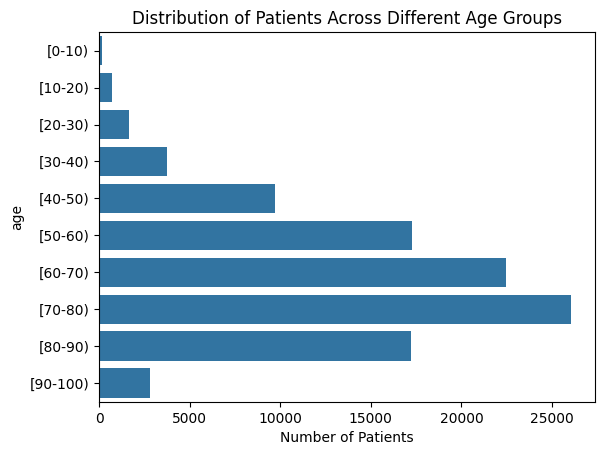

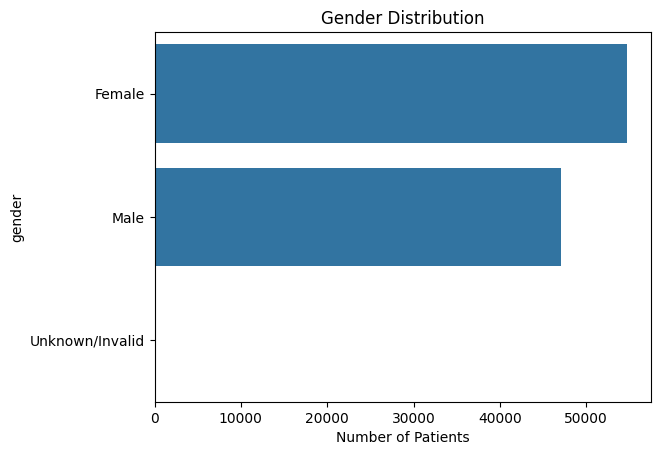

In [36]:
sns.countplot(data['age'])
plt.title('Distribution of Patients Across Different Age Groups')
plt.xlabel('Number of Patients')
plt.show()

# Gender distribution
sns.countplot(data['gender'])
plt.title('Gender Distribution')
plt.xlabel('Number of Patients')
plt.show()

####**Question 2 : What is the overall distribution of the length of hospital stays?**

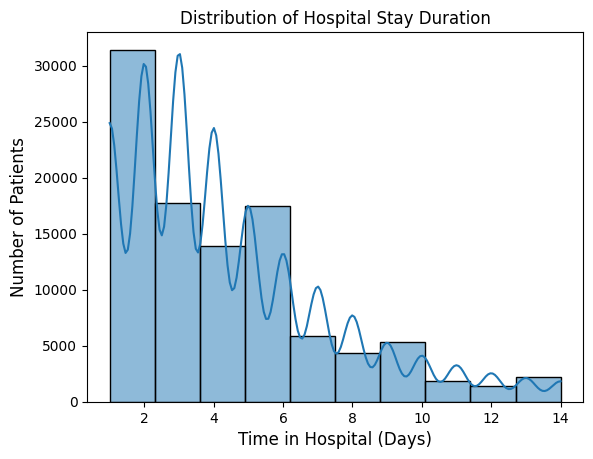

In [37]:
sns.histplot(data['time_in_hospital'], kde=True, bins=10)
plt.title('Distribution of Hospital Stay Duration')
plt.xlabel('Time in Hospital (Days)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()

In [38]:
diagnosis_columns = ['diag_1', 'diag_2', 'diag_3']
data[diagnosis_columns] = data[diagnosis_columns].replace('?', np.nan)

####**Question 3 : What are the most common diagnoses among patients?**

Most common diagnosis are represented by their ICD-9 codes. According to it, Heart Failure , Diabetes Mellitus, Disorders of Fluid and Electrolyte Balance, Coronary Atherosclerosis and Essential Hypertension are the 5 most common diagnoses.

In [39]:
all_diag = pd.concat([data['diag_1'],data['diag_2'], data['diag_3']])
all_diag = all_diag.dropna()

In [40]:
diag_count = all_diag.value_counts()
print("Top 10 Most common diagnosis : ")
print(diag_count.head(10))

Top 10 Most common diagnosis : 
428    18101
250    17861
276    13816
414    12895
401    12371
427    11757
599     6824
496     5990
403     5693
486     5455
Name: count, dtype: int64


Here’s a detailed description of the ICD-9 codes :

1. 428 - Heart Failure
2. 250 - Diabetes Mellitus
3. 276 - Disorders of Fluid and Electrolyte Balance
4. 414 - Coronary Atherosclerosis
5. 401 - Essential Hypertension
6. 427 - Cardiac Dysrhythmias
7. 599 - Other Disorders of Urethra and Urinary Tract
8. 496 - Chronic Airway Obstruction (COPD)
9. 403 - Hypertensive Kidney Disease
10. 486 - Pneumonia

The numbers 18101, 17861, 13816, ... that you see alongside the ICD-9 codes represent the count of occurrences of each ICD code.

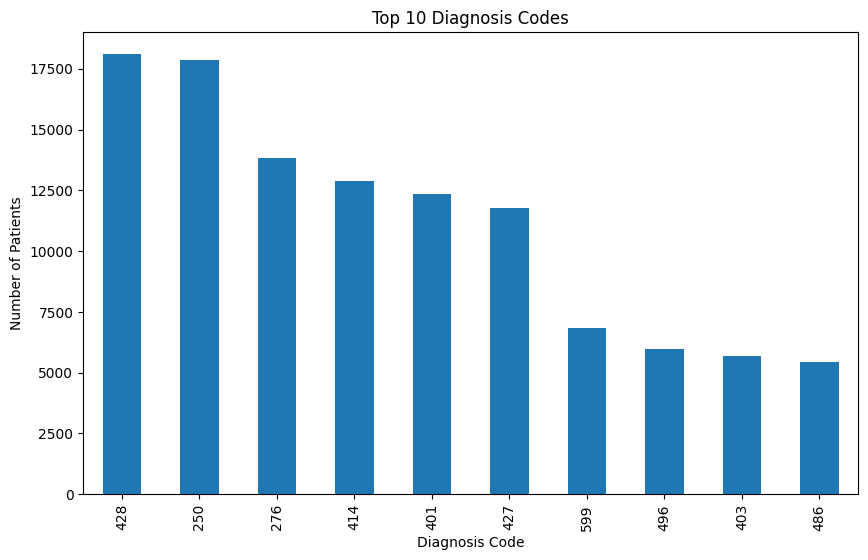

In [41]:
top_diag = diag_count.head(10)
plt.figure(figsize=(10,6))
top_diag.plot(kind='bar')
plt.title('Top 10 Diagnosis Codes')
plt.xlabel('Diagnosis Code')
plt.ylabel('Number of Patients')
plt.show()

##**Statistical and Correlation Analysis**

####**Question 4 : Is there a correlation between the number of lab procedures and the length of hospital stay?**

In [42]:
from scipy.stats import pearsonr

lab_procedures = data['num_lab_procedures']
hospital_stay = data['time_in_hospital']

# Calculate the correlation coefficient
correlation_coefficient, p_value = pearsonr(lab_procedures, hospital_stay)
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

Correlation Coefficient: 0.32
P-value: 0.0000


**Correlation Coefficient = 0.32 :** This shows a weak to moderate positive correlation between the number of lab procedures and the length of hospital stay.

*   As the number of lab procedures increases, the length of the hospital stay tends to **increase slightly**.
*   However, the relationship is not very strong (since the coefficient is far from 1).

**P-value = 0 :** This confirms that the correlation is **statistically significant**.

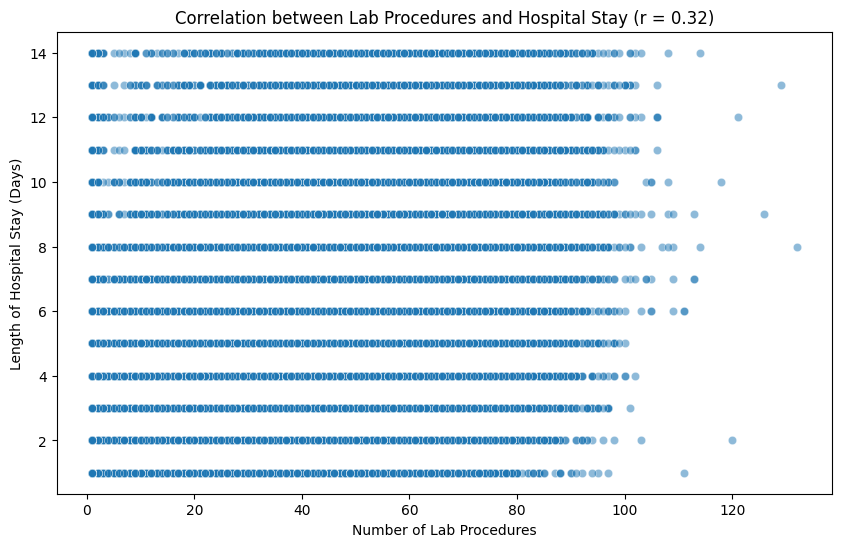

In [43]:
# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lab_procedures, y=hospital_stay, alpha=0.5)
plt.title(f"Correlation between Lab Procedures and Hospital Stay (r = {correlation_coefficient:.2f})")
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Length of Hospital Stay (Days)")
plt.show()

####**Question 5 : Do certain races or age groups tend to receive more lab procedures or medications?**

The first bar chart shows that patients are having approximate similar number of lab procedures despite having different races. However, medication may vary a bit.

The second bar chart shows that number of lab medications vary with the age but the average lab procedure is approximate similar for each age group.

<ipython-input-44-214bd8485a62>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['race']= data['race'].replace('?', np.nan, inplace=True)


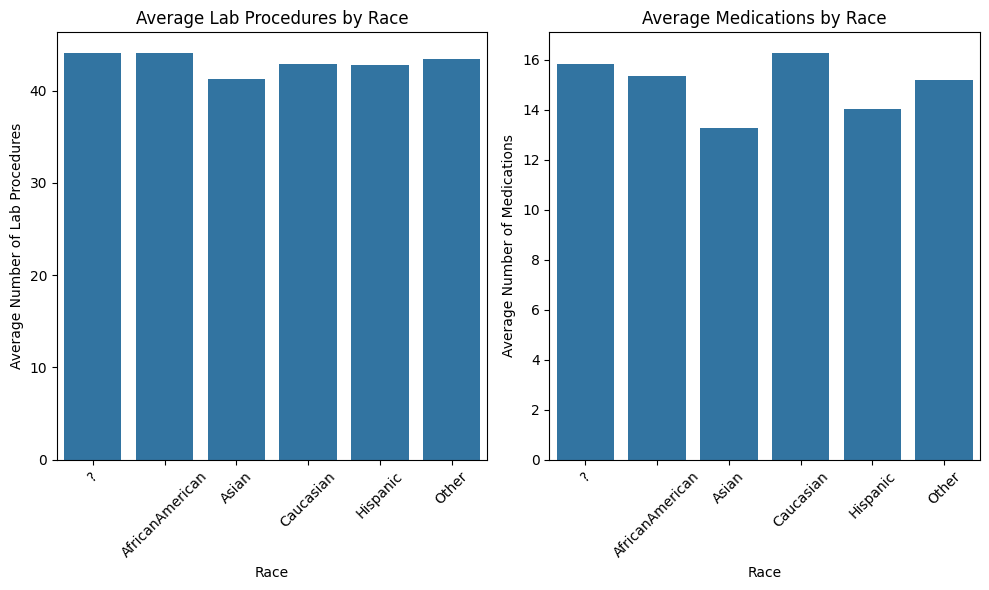

In [44]:
# Group data by Race and calculate mean for lab procedures and medications
race_summary = data.groupby('race')[['num_lab_procedures','num_medications']].mean().dropna().reset_index()
data['race']= data['race'].replace('?', np.nan, inplace=True)

plt.figure(figsize=(10,6))

# Lab Procedures by Race
plt.subplot(1,2,1)
sns.barplot(x='race', y='num_lab_procedures', data=race_summary)
plt.title('Average Lab Procedures by Race')
plt.xlabel('Race')
plt.ylabel('Average Number of Lab Procedures')
plt.xticks(rotation=45)

# Medications by Race
plt.subplot(1,2,2)
sns.barplot(x='race', y='num_medications', data=race_summary)
plt.title('Average Medications by Race')
plt.xlabel('Race')
plt.ylabel('Average Number of Medications')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-45-18a4daa9012e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age']= data['age'].replace('?', np.nan, inplace=True)


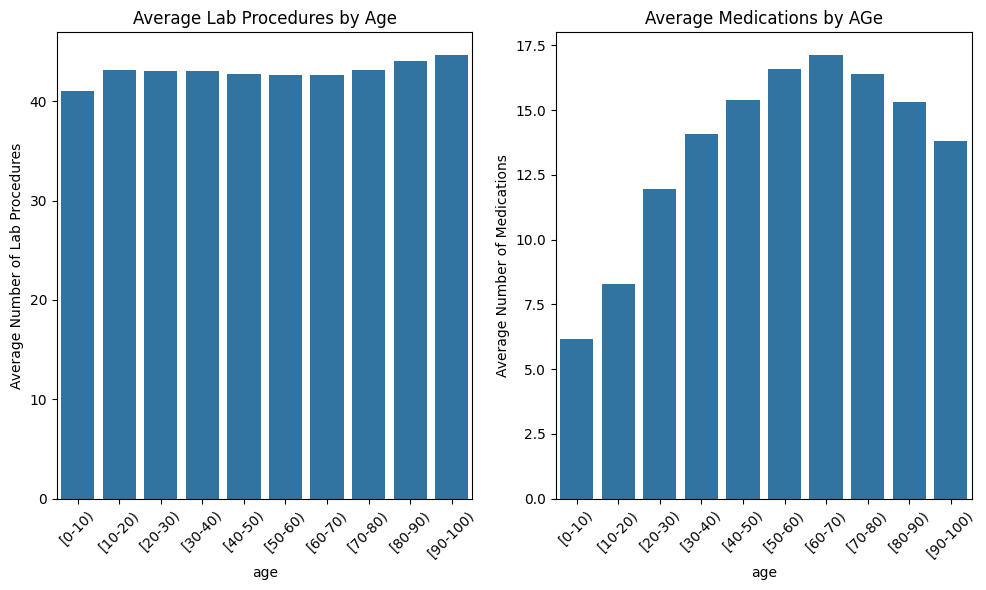

In [45]:
# Group data by Age and calculate mean for lab procedures and medications
race_summary = data.groupby('age')[['num_lab_procedures','num_medications']].mean().dropna().reset_index()
data['age']= data['age'].replace('?', np.nan, inplace=True)

plt.figure(figsize=(10,6))

# Lab Procedures by Race
plt.subplot(1,2,1)
sns.barplot(x='age', y='num_lab_procedures', data=race_summary)
plt.title('Average Lab Procedures by Age')
plt.xlabel('age')
plt.ylabel('Average Number of Lab Procedures')
plt.xticks(rotation=45)

# Medications by Race
plt.subplot(1,2,2)
sns.barplot(x='age', y='num_medications', data=race_summary)
plt.title('Average Medications by Age')
plt.xlabel('age')
plt.ylabel('Average Number of Medications')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


####**Question 6 : Is there a relationship between the number of medications prescribed and readmission rates?**

Patients with higher numbers of medications tend to have more frequent readmissions

<ipython-input-46-6b4196af0086>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='readmitted', y='num_medications', data=readmitted_summary, palette='coolwarm')


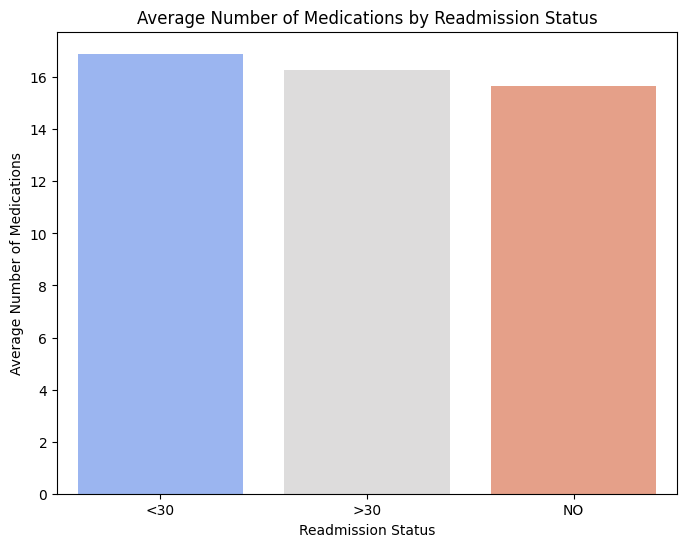

In [46]:
# Group by 'readmitted' and calculate the average number of medications
readmitted_summary = data.groupby('readmitted')['num_medications'].mean().reset_index()

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.barplot(x='readmitted', y='num_medications', data=readmitted_summary, palette='coolwarm')
plt.title('Average Number of Medications by Readmission Status')
plt.ylabel('Average Number of Medications')
plt.xlabel('Readmission Status')
plt.show()
